In [1]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
# Célula de imports
import pandas as pd
import numpy as np

# gerar graficos
import matplotlib.pyplot as plt
#gerar no proprio browser
%matplotlib inline
import seaborn as sns

from scipy.stats import boxcox

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Perceptron 
from sklearn.linear_model import LogisticRegression 

In [3]:
def curva_aprendizado(estimador, x, y):
    plt.figure()
    plt.title("Curva de Aprendizado")
    plt.xlabel('Pontos do treinamento')
    plt.ylabel('Desempenho')
    plt.grid()
    
    pontos, desempenho_in, desempenho_out = learning_curve(estimador, x, y, train_sizes=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
    
    media_in = np.mean(desempenho_in, axis=1)
    desvio_in = np.std(desempenho_in, axis=1)
    media_out = np.mean(desempenho_out, axis=1)
    desvio_out = np.std(desempenho_out, axis=1)
    
    
    plt.plot(pontos, media_in, 'o-', color='red', label='Treinamento')
    plt.plot(pontos, media_out, 'o-', color='green', label='Teste')
    
    plt.fill_between(pontos, media_in - desvio_in, media_in + desvio_in, color='red', alpha=0.2)
    plt.fill_between(pontos, media_out - desvio_out, media_out + desvio_out, color='green', alpha=0.2)
    
    
    plt.legend()
    
    return plt

In [4]:
dados = pd.read_csv('titanic.csv')
copia = dados.copy()
dados.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
479,480,1,3,"Hirvonen, Miss. Hildur E",female,2.0,0,1,3101298,12.2875,NaN,S
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
533,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,NaN,0,2,2668,22.3583,NaN,C
693,694,0,3,"Saad, Mr. Khalil",male,25.0,0,0,2672,7.2250,NaN,C
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C


In [5]:
dados.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
dados.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
292,0,2,male,36.0,0,0,12.8750,D,C
504,1,1,female,16.0,0,0,86.5000,B79,S
349,0,3,male,42.0,0,0,8.6625,NaN,S
767,0,3,female,30.5,0,0,7.7500,NaN,Q
679,1,1,male,36.0,0,1,512.3292,B51 B53 B55,C


In [6]:
dados['Family'] = dados['SibSp'] + dados['Parch']
dados.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [7]:
dados.sample(5)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
838,1,3,male,32.0,56.4958,NaN,S,0
594,0,2,male,37.0,26.0000,NaN,S,1
296,0,3,male,23.5,7.2292,NaN,C,0
398,0,2,male,23.0,10.5000,NaN,S,0
321,0,3,male,27.0,7.8958,NaN,S,0


In [8]:
dados.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Cabin       687
Embarked      2
Family        0
dtype: int64

In [9]:
dados.drop('Cabin', axis=1, inplace=True)

In [10]:
dados['Embarked'].fillna("NNN", inplace=True)

In [11]:
dados = dados.loc[dados['Embarked'] != "NNN", :]

In [12]:
dados['Title'] = 0

for i in dados:
    dados['Title'] = copia['Name'].str.extract('([A-Za-z]+)\.', expand=False)
    
dados.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Title
95,0,3,male,NaN,8.0500,S,0,Mr
79,1,3,female,30.0,12.4750,S,0,Miss
847,0,3,male,35.0,7.8958,C,0,Mr
243,0,3,male,22.0,7.1250,S,0,Mr
223,0,3,male,NaN,7.8958,S,0,Mr


In [13]:
dados['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

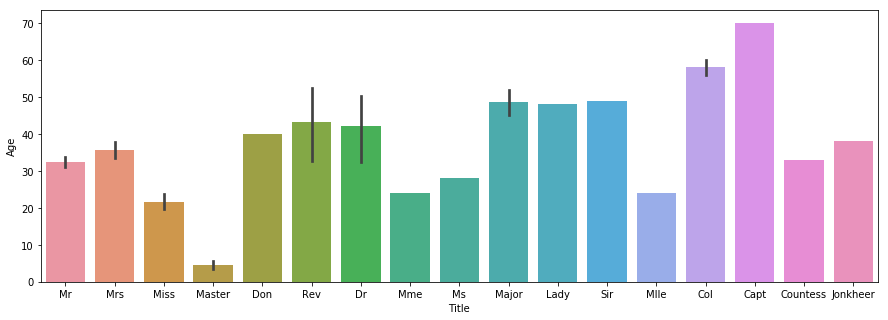

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(x=dados['Title'], y=dados['Age'])

In [15]:
medias_idade = dados.groupby('Title')['Age'].mean().to_dict()
medias_idade

{'Capt': 70.0,
 'Col': 58.0,
 'Countess': 33.0,
 'Don': 40.0,
 'Dr': 42.0,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 4.574166666666667,
 'Miss': 21.662068965517243,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 32.368090452261306,
 'Mrs': 35.654205607476634,
 'Ms': 28.0,
 'Rev': 43.166666666666664,
 'Sir': 49.0}

In [16]:
sem_idade = dados.loc[np.isnan(dados['Age'])].index
dados.loc[sem_idade, 'Age'] = dados['Title'].loc[sem_idade].map(medias_idade)

In [17]:
dados.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Family      0
Title       0
dtype: int64

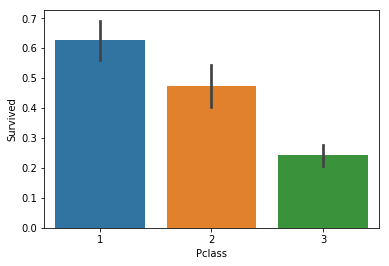

In [18]:
sns.barplot(x=dados['Pclass'], y=dados['Survived'])

In [19]:
titles_dict = {'Capt': 'Other',
               'Major': 'Other',
               'Jonkheer': 'Other',
               'Don': 'Other',
               'Sir': 'Other',
               'Dr': 'Other',
               'Rev': 'Other',
               'Countess': 'Other',
               'Dona': 'Other',
               'Mme': 'Mrs',
               'Mlle': 'Miss',
               'Ms': 'Miss',
               'Mr': 'Mr',
               'Mrs': 'Mrs',
               'Miss': 'Miss',
               'Master': 'Master',
               'Lady': 'Other'}

dados['Title'] = dados['Title'].map(titles_dict)

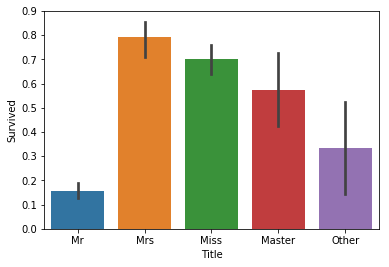

In [20]:
sns.barplot(x=dados['Title'], y=dados['Survived'])

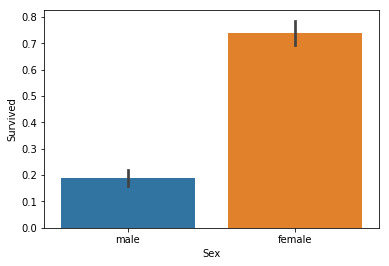

In [21]:
sns.barplot(x=dados['Sex'], y=dados['Survived'])

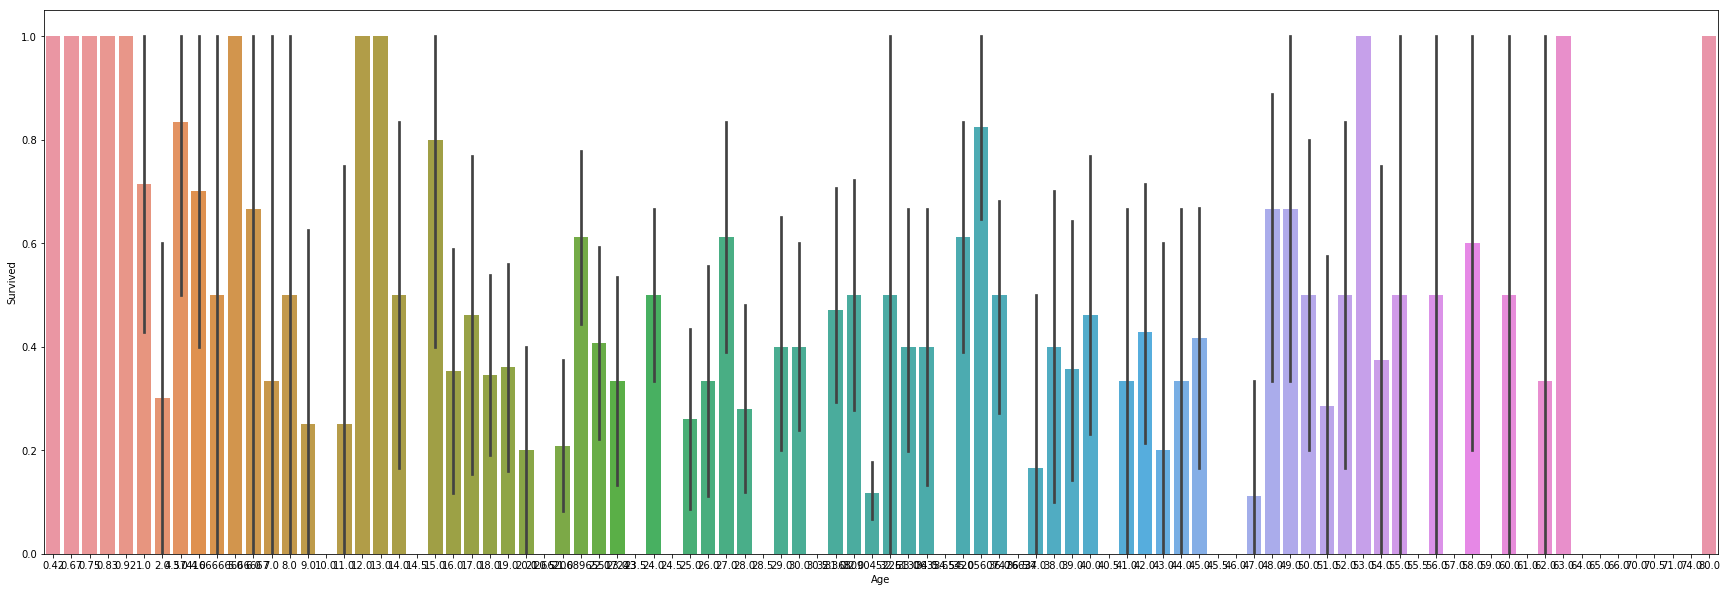

In [22]:
plt.figure(figsize=(30, 10))
sns.barplot(x=dados['Age'], y=dados['Survived'])

In [23]:
dados['Age'] = pd.cut(dados['Age'], bins=[0, 14, 50, 200], labels=['C', 'A', 'V'])

In [24]:
dados.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Title
473,1,2,female,A,13.7917,C,0,Mrs
134,0,2,male,A,13.0000,S,0,Mr
845,0,3,male,A,7.5500,S,0,Mr
288,1,2,male,A,13.0000,S,0,Mr
653,1,3,female,A,7.8292,Q,0,Miss


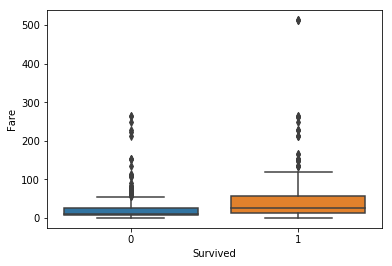

In [25]:
sns.boxplot(dados['Survived'], dados['Fare'])

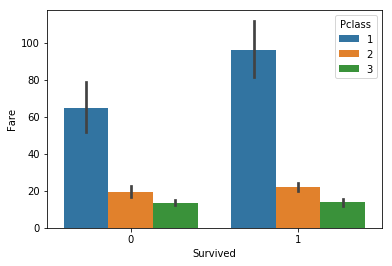

In [26]:
sns.barplot(dados['Survived'], dados['Fare'], dados['Pclass'])

In [27]:
dados['Pclass'] = pd.Categorical(dados['Pclass'])

In [28]:
dados['Fare'] = boxcox(dados['Fare'] + 1)[0]

In [29]:
x = dados.loc[:, dados.columns != 'Survived']
y = dados['Survived']

In [31]:
x = pd.get_dummies(x)
x.shape

(889, 18)

In [34]:
x = MinMaxScaler().fit_transform(x)

In [37]:
polinomios = PolynomialFeatures(degree=2)
polinomios.fit(x)
x=polinomios.transform(x)

In [38]:
x.shape

(889, 190)

In [46]:
teste_lr = LogisticRegression()
maior_score = 0
n_ideal = 0
for i in range(1, 191):
    melhores = SelectKBest(score_func=chi2, k=i)
    melhores.fit(x, y)
    
    teste_x = melhores.transform(x)
    teste_lr.fit(teste_x, y)
    score = teste_lr.score(teste_x, y)
    print(f'Score {score} para {i} features')
    if score > maior_score:
        maior_score = score
        n_ideal = i
        
print(f'Melhor resultado {maior_score} para {n_ideal} feature')
        

Score 0.7862767154105736 para 1 features
Score 0.7862767154105736 para 2 features
Score 0.7862767154105736 para 3 features
Score 0.7862767154105736 para 4 features
Score 0.7862767154105736 para 5 features
Score 0.7862767154105736 para 6 features
Score 0.7862767154105736 para 7 features
Score 0.7862767154105736 para 8 features
Score 0.7862767154105736 para 9 features
Score 0.7862767154105736 para 10 features
Score 0.7862767154105736 para 11 features
Score 0.7862767154105736 para 12 features
Score 0.7896512935883014 para 13 features
Score 0.7896512935883014 para 14 features
Score 0.7896512935883014 para 15 features
Score 0.7986501687289089 para 16 features
Score 0.7997750281214848 para 17 features
Score 0.7997750281214848 para 18 features
Score 0.7997750281214848 para 19 features
Score 0.8200224971878515 para 20 features
Score 0.8200224971878515 para 21 features
Score 0.8200224971878515 para 22 features
Score 0.8200224971878515 para 23 features
Score 0.8200224971878515 para 24 features
S

In [47]:
melhores = SelectKBest(score_func=chi2, k=n_ideal)
melhores.fit(x,y)
x = melhores.transform(x)

In [48]:
pla = Perceptron()
rl = LogisticRegression()

In [49]:
pla.fit(x,y)
rl.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
print(f'Score Perceptron {pla.score(x,y)}')
print(f'Score LogReg {rl.score(x,y)}')

Score Perceptron 0.8065241844769404
Score LogReg 0.843644544431946


<module 'matplotlib.pyplot' from '/home/usuario/Allan-manha/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

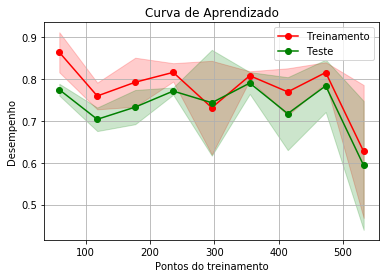

In [51]:
curva_aprendizado(pla,x,y)

<module 'matplotlib.pyplot' from '/home/usuario/Allan-manha/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

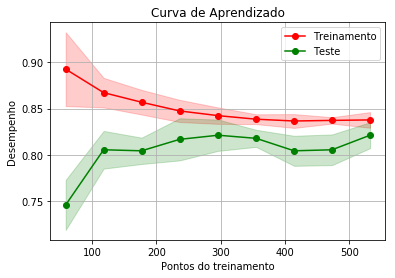

In [52]:
curva_aprendizado(rl,x,y)